<a href="https://colab.research.google.com/github/Titir1/codes-for-time-series/blob/master/price_split_adjusted1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1TctxTXGNF0SQSS8ib35KNhaR7HHkFQbb'})
downloaded.GetContentFile('prices-split-adjusted.csv')

In [4]:
import numpy as np
import math
import pandas as pd
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [6]:
df=pd.read_csv('prices-split-adjusted.csv',encoding='latin-1')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
import datetime

In [8]:
df['DATE']=pd.to_datetime(df['date']).dt.date

In [9]:
def createdf(c1,d1,c2,d2):
    dic = {c1:d1,c2:d2}
    df = pd.DataFrame(dic)
    return df

In [10]:
c = createdf("Date",df["DATE"].value_counts().index,"close",df["DATE"].value_counts())

In [11]:
c.head()

,Date,close
2016-10-18,2016-10-18,501
2016-11-02,2016-11-02,501
2016-08-05,2016-08-05,501
2016-10-11,2016-10-11,501
2016-09-08,2016-09-08,501


In [12]:
c.index=pd.to_datetime(c.index)

In [14]:
Y=c['close'].resample('MS').mean()

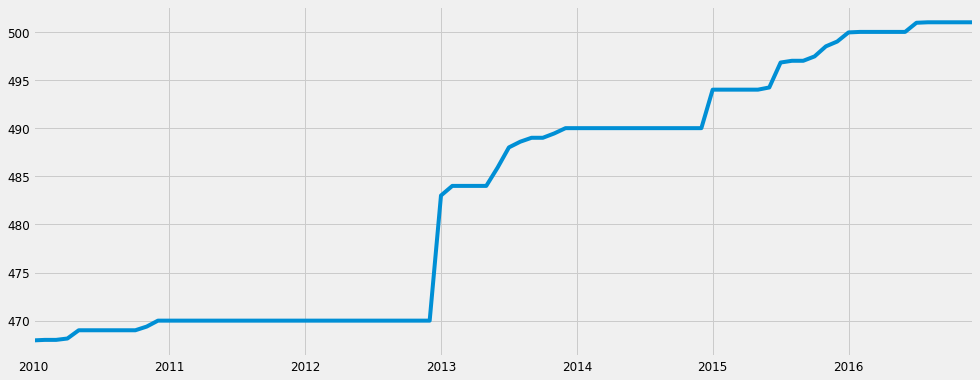

In [15]:
Y.plot(figsize=(15,6))
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot

In [17]:
d=c.sort_values(by="Date",ascending = True)

In [18]:
d.head()

,Date,close
2010-01-04,2010-01-04,467
2010-01-05,2010-01-05,468
2010-01-06,2010-01-06,468
2010-01-07,2010-01-07,468
2010-01-08,2010-01-08,468


In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

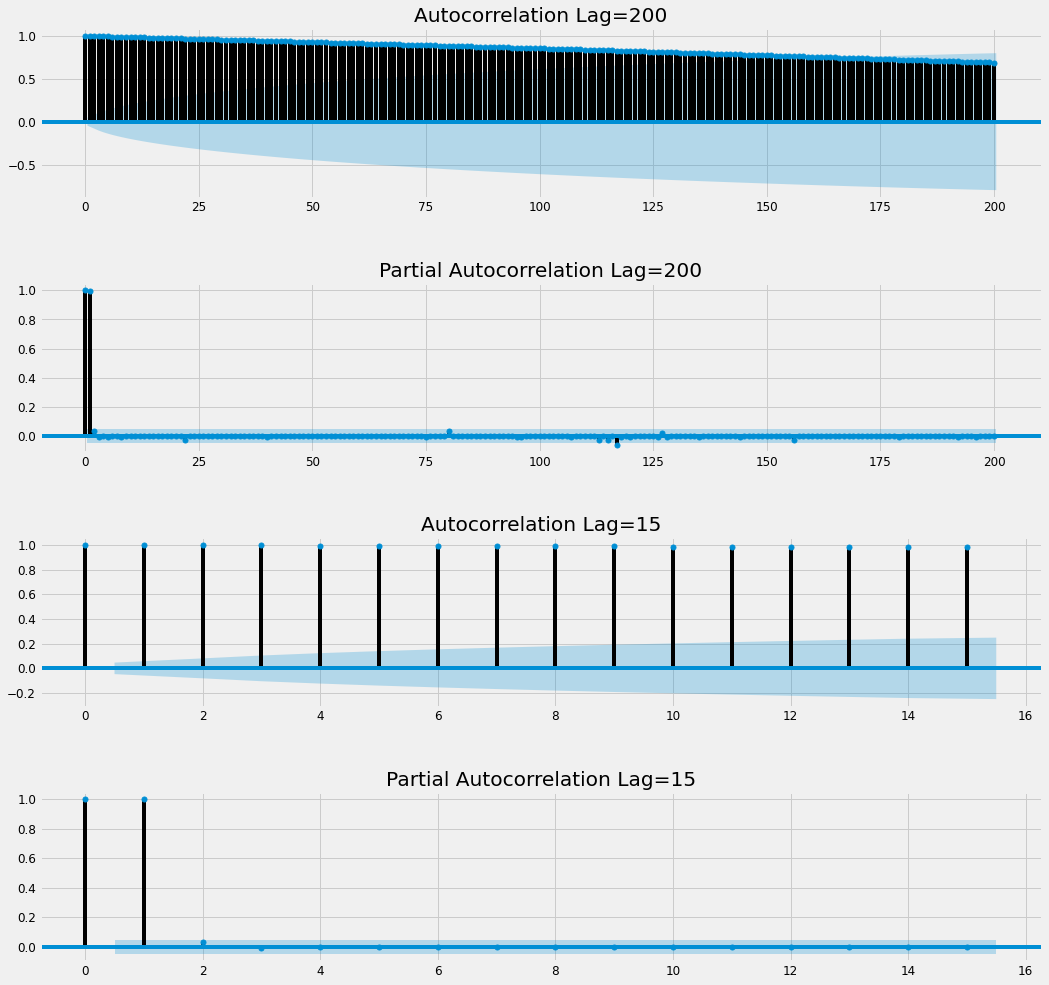

In [20]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(d["close"],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(d["close"],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(d["close"],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(d["close"],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()


In [21]:
import matplotlib.ticker as ticker
import statsmodels.api as sm

In [22]:
def test_stationarity(series,mlag = 365, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)

In [23]:
test_stationarity(d['close'],lag='AIC')

ADF Test Result
Test Statistic                   -0.408514
p value                           0.908667
used lag                          0.000000
Number of observations used    1761.000000
Critical Value 1%                -3.434069
Critical Value 5%                -2.863183
Critical Value 10%               -2.567645
dtype: float64


In [43]:
import seaborn as sns

In [46]:

d1['close'] = d1['close'].diff(1)

In [47]:
d1.head()

,Date,close
2010-01-05,2010-01-05,NaN
2010-01-06,2010-01-06,-1.0
2010-01-07,2010-01-07,0.0
2010-01-08,2010-01-08,0.0
2010-01-11,2010-01-11,0.0


In [48]:
d1.isna().sum()

Date     0
close    1
dtype: int64

In [49]:
d1 = d1.dropna(axis=0)

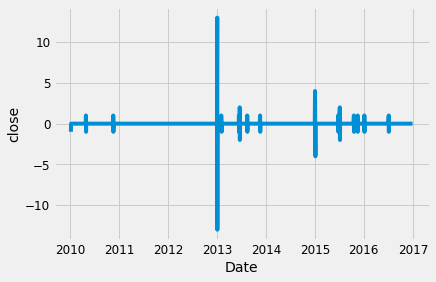

In [50]:
sns.lineplot(x="Date",y="close",data=d1)


In [51]:
import math
print('Average= '+str(d1['close'].mean()))
print('Std= ' + str(d1['close'].std()))
print('SE= ' + str(d1['close'].std()/math.sqrt(len(d1))))
print(test_stationarity(d1['close'],lag = 'AIC'))

Average= -0.0005681818181818182
Std= 0.4833789021642705
SE= 0.01152209249110593
ADF Test Result
Test Statistic                -1.637664e+01
p value                        2.777055e-29
used lag                       2.000000e+01
Number of observations used    1.739000e+03
Critical Value 1%             -3.434116e+00
Critical Value 5%             -2.863203e+00
Critical Value 10%            -2.567656e+00
dtype: float64
None


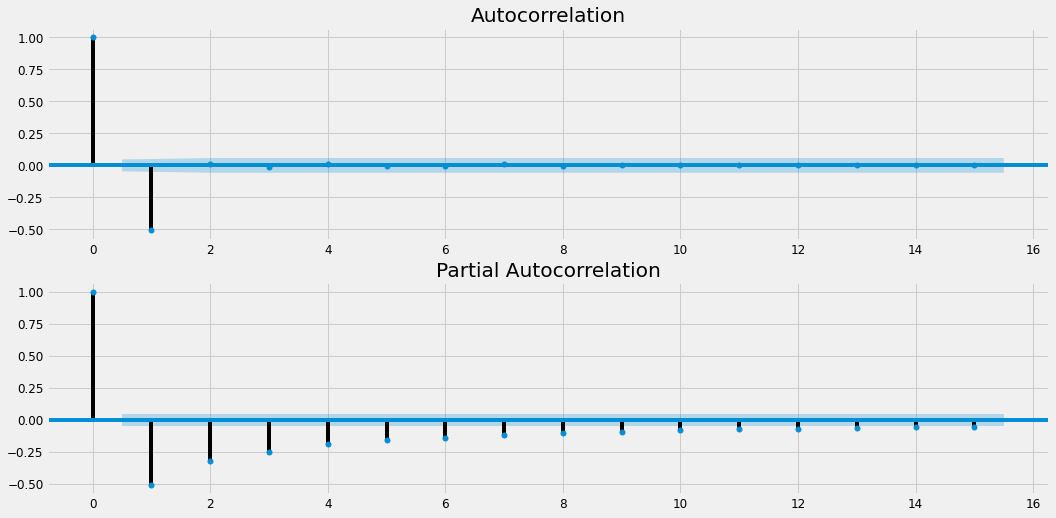

In [64]:
fig_2 = plt.figure(figsize=(16,8))
ax1_2 = fig_2.add_subplot(211)
fig_2 = plot_acf(d1["close"],lags=15,ax=ax1_2)
ax2_2 = fig_2.add_subplot(212)
fig_2 = plot_pacf(d1["close"],lags=15,ax=ax2_2)

In [65]:
d=c.sort_values(by="Date",ascending = True)

In [66]:
d.head()

,Date,close
2010-01-04,2010-01-04,467
2010-01-05,2010-01-05,468
2010-01-06,2010-01-06,468
2010-01-07,2010-01-07,468
2010-01-08,2010-01-08,468


In [67]:
ts=d

In [68]:
d['Date'].max()

datetime.date(2016, 12, 30)

In [69]:
ts=d

In [70]:
d['Date'].max()

datetime.date(2016, 12, 30)